# Recommendation System / Collaborative Filtering on MovieLens 20M Dataset :


## **MovieLens Dataset**

The datasets describe ratings and free-text tagging activities from MovieLens, a movie recommendation service. It contains 20000263 ratings and 465564 tag applications across 27278 movies. These data were created by 138493 users between January 09, 1995 and March 31, 2015. This dataset was generated on October 17, 2016. Permalink : https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset?datasetId=339&sortBy=voteCount&select=link.csv

### **Exploratory Data Analysis**

Importing the necessary libraries :

In [2]:
import os
import pandas as pd
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
from nltk.tokenize import word_tokenize
from google.colab import files

os.environ['KAGGLE_CONFIG_DIR']='/content/'
!kaggle datasets download -d grouplens/movielens-20m-dataset

 99% 194M/195M [00:09<00:00, 23.0MB/s]
100% 195M/195M [00:09<00:00, 22.5MB/s]


Unzipping the movielens-20m-dataset.zip :

In [3]:
!unzip \*.zip

Archive:  movielens-20m-dataset.zip
  inflating: genome_scores.csv       
  inflating: genome_tags.csv         
  inflating: link.csv                
  inflating: movie.csv               
  inflating: rating.csv              
  inflating: tag.csv                 


Loading the datasets :

In [4]:
movies = pd.read_csv('/content/movie.csv')
ratings = pd.read_csv('/content/rating.csv')
tag = pd.read_csv('/content/tag.csv')
link = pd.read_csv('/content/link.csv')
scores = pd.read_csv('/content/genome_scores.csv')
genome_tags = pd.read_csv('/content/genome_tags.csv')

### Movies Data :

First few entries of the movie file :

In [5]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


WordCloud of the Movie Titles :

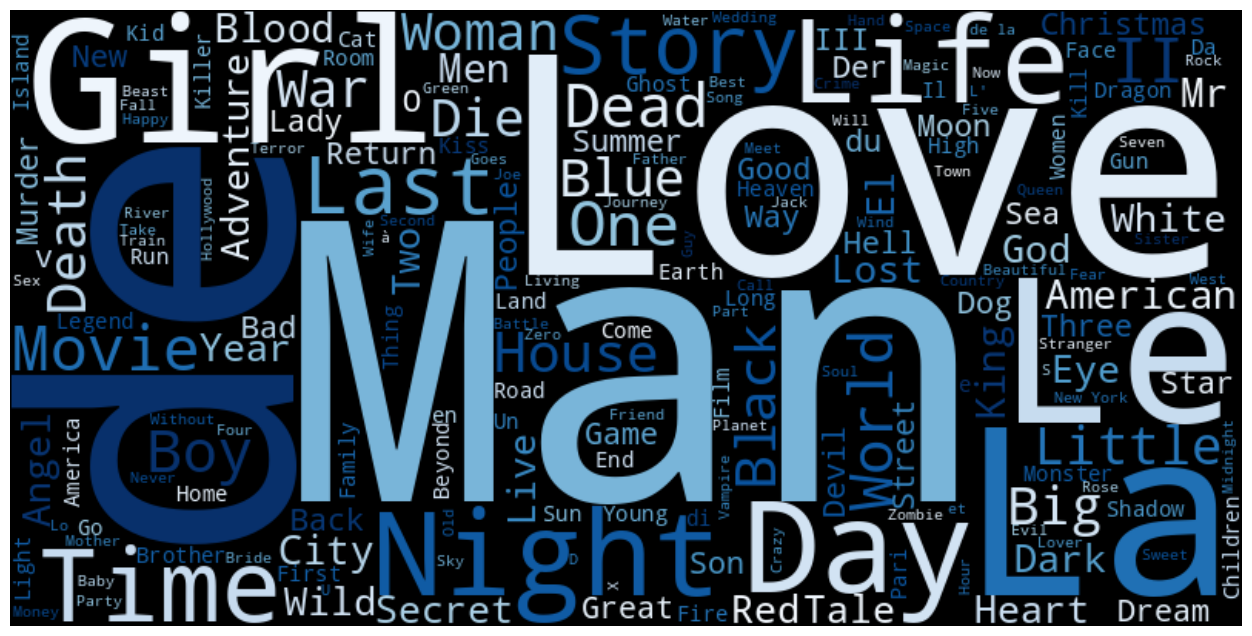

In [18]:
movies['title'] = movies['title'].fillna("").astype(str)
title_corpus = ' '.join(movies['title'])

wordcloud = WordCloud(width=800, height=400, colormap="Blues")
wordcloud.generate(title_corpus)

plt.figure(figsize=(16, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [19]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27278 entries, 0 to 27277
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  27278 non-null  int64 
 1   title    27278 non-null  object
 2   genres   27278 non-null  object
dtypes: int64(1), object(2)
memory usage: 639.5+ KB


Number of Movies :



In [20]:
total_movies = movies['movieId'].max()

print('The number of movieId ranges from 1 to ', total_movies)

The number of movieId ranges from 1 to  131262


Unique genres of the movies :

In [25]:
all_genres = '|'.join(movies['genres']).split('|')
unique_genres = set(all_genres)

print("Individual genres:", unique_genres)
print("Number of unique genres:", len(unique_genres))

Individual genres: {'War', 'Fantasy', 'Children', 'Drama', 'Mystery', 'Western', 'Animation', 'Adventure', 'Musical', 'Sci-Fi', 'IMAX', 'Crime', '(no genres listed)', 'Thriller', 'Film-Noir', 'Horror', 'Documentary', 'Comedy', 'Action', 'Romance'}
Number of unique genres: 20


Most common to least common genres with their counts :

In [26]:
genre_counts = pd.Series(all_genres).value_counts()

print("Genres and their counts:\n")
print(genre_counts)

Genres and their counts:

Drama                 13344
Comedy                 8374
Thriller               4178
Romance                4127
Action                 3520
Crime                  2939
Horror                 2611
Documentary            2471
Adventure              2329
Sci-Fi                 1743
Mystery                1514
Fantasy                1412
War                    1194
Children               1139
Musical                1036
Animation              1027
Western                 676
Film-Noir               330
(no genres listed)      246
IMAX                    196
dtype: int64


We can see that the top 5 genres are Drama, Comedy, Thriller, Romance and Action.

WorldCloud of the Genres :

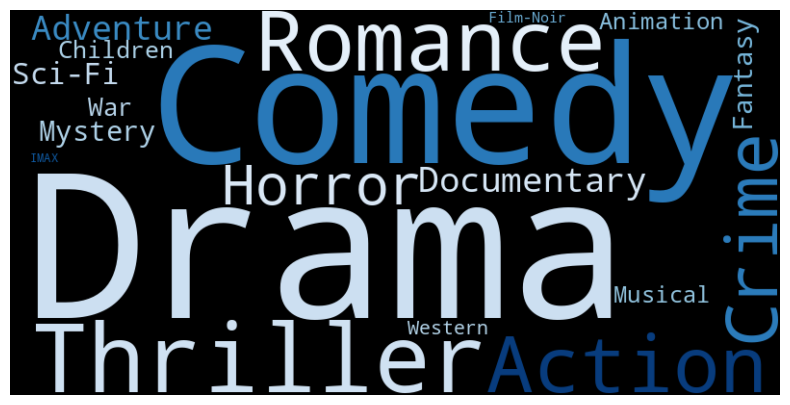

In [29]:
genre_counts = Counter(all_genres)
genre_counts.pop('(no genres listed)', None)
wordcloud = WordCloud(width=800, height=400, colormap="Blues")

# Wordcloud based on the frequency of each genre:
wordcloud.generate_from_frequencies(genre_counts)


plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Ratings Data :

In [30]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,2,3.5,2005-04-02 23:53:47
1,1,29,3.5,2005-04-02 23:31:16
2,1,32,3.5,2005-04-02 23:33:39
3,1,47,3.5,2005-04-02 23:32:07
4,1,50,3.5,2005-04-02 23:29:40


In [31]:
print('The total number of userId are: ', ratings['userId'].count())
print('Unique number of userId are: ', ratings['userId'].max())
print('The total number of movieId are: ', ratings['movieId'].count())
print('Unique number of movieId are: ', ratings['movieId'].max())
print('Unique ratings:', ratings.rating.unique())
print('The total number of timestamps are: ', ratings['timestamp'].count())
print('Average rating:', round(ratings.rating.mean(), 2))
print('Frequency of each rating value:', ratings['rating'].value_counts())

The total number of userId are:  20000263
Unique number of userId are:  138493
The total number of movieId are:  20000263
Unique number of movieId are:  131262
Unique ratings: [3.5 4.  3.  4.5 5.  2.  1.  2.5 0.5 1.5]
The total number of timestamps are:  20000263
Average rating: 3.53
Frequency of each rating value: 4.0    5561926
3.0    4291193
5.0    2898660
3.5    2200156
4.5    1534824
2.0    1430997
2.5     883398
1.0     680732
1.5     279252
0.5     239125
Name: rating, dtype: int64


Checking for null values in the 'rating' column:

In [32]:
null_count = ratings['rating'].isnull().sum()

print(f"Number of null values in 'rating' column: {null_count}")

Number of null values in 'rating' column: 0


Ratings distribution :

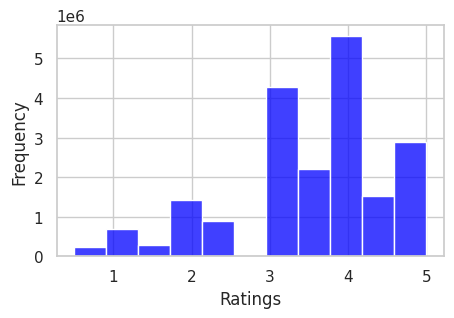

In [33]:
ratings['rating'].unique()
ratings['rating'] = ratings['rating'].astype(float)

sns.set(style="whitegrid")
plt.figure(figsize=(5, 3))
sns.histplot(ratings['rating'], bins=11, kde=False, color='blue')
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.show()

Top 10 most rated movies :

In [35]:
top_movie_ids = ratings['movieId'].value_counts().nlargest(n=10)
top_movie_titles = movies[movies['movieId'].isin(top_movie_ids.index)]['title']

print('Top 10 most rated movies are:\n')
for movie_id, count in top_movie_ids.items():
    movie_title = top_movie_titles[movies['movieId'] == movie_id].iloc[0]
    print(f" Count: {count}, {movie_title}")

Top 10 most rated movies are:

 Count: 67310, Pulp Fiction (1994)
 Count: 66172, Forrest Gump (1994)
 Count: 63366, Shawshank Redemption, The (1994)
 Count: 63299, Silence of the Lambs, The (1991)
 Count: 59715, Jurassic Park (1993)
 Count: 54502, Star Wars: Episode IV - A New Hope (1977)
 Count: 53769, Braveheart (1995)
 Count: 52244, Terminator 2: Judgment Day (1991)
 Count: 51334, Matrix, The (1999)
 Count: 50054, Schindler's List (1993)


Extracting the year and month :

In [36]:
ratings = pd.DataFrame(ratings)
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'])
ratings['year'] = ratings['timestamp'].dt.year
ratings['month'] = ratings['timestamp'].dt.month
print(ratings)

          userId  movieId  rating           timestamp  year  month
0              1        2     3.5 2005-04-02 23:53:47  2005      4
1              1       29     3.5 2005-04-02 23:31:16  2005      4
2              1       32     3.5 2005-04-02 23:33:39  2005      4
3              1       47     3.5 2005-04-02 23:32:07  2005      4
4              1       50     3.5 2005-04-02 23:29:40  2005      4
...          ...      ...     ...                 ...   ...    ...
20000258  138493    68954     4.5 2009-11-13 15:42:00  2009     11
20000259  138493    69526     4.5 2009-12-03 18:31:48  2009     12
20000260  138493    69644     3.0 2009-12-07 18:10:57  2009     12
20000261  138493    70286     5.0 2009-11-13 15:42:24  2009     11
20000262  138493    71619     2.5 2009-10-17 20:25:36  2009     10

[20000263 rows x 6 columns]


Checking for null values in the 'year' column :

Number of null values in 'year' column: 0



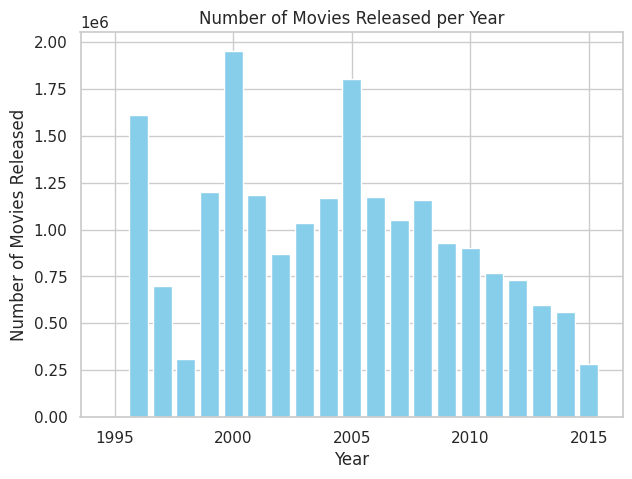

In [37]:
null_year= ratings['year'].isnull().sum()
print(f"Number of null values in 'year' column: {null_count}\n")

# Movies released per year :

movies_released_per_year = ratings.groupby('year')['movieId'].count()

plt.figure(figsize=(7, 5))
plt.bar(movies_released_per_year.index, movies_released_per_year.values, color='skyblue')
plt.xlabel('Year')
plt.ylabel('Number of Movies Released')
plt.title('Number of Movies Released per Year')
plt.grid(True)
plt.show()

### Tag Data :

In [38]:
tag.head()

,userId,movieId,tag,timestamp
0,18,4141,Mark Waters,2009-04-24 18:19:40
1,65,208,dark hero,2013-05-10 01:41:18
2,65,353,dark hero,2013-05-10 01:41:19
3,65,521,noir thriller,2013-05-10 01:39:43
4,65,592,dark hero,2013-05-10 01:41:18


In [39]:
print('The total number of userId are: ', tag['userId'].count())
print('Unique number of userId are: ', tag['userId'].max())
print('The total number of movieId are: ', tag['movieId'].count())
print('Unique number of movieId are: ', tag['movieId'].max())
print('The total number of Timestamp are: ', tag['timestamp'].count())

The total number of userId are:  465564
Unique number of userId are:  138472
The total number of movieId are:  465564
Unique number of movieId are:  131258
The total number of Timestamp are:  465564


Number of unique tags :

In [40]:
print("Unique tags:", tag['tag'].unique())
print("Number of unique tags:", len(tag['tag'].unique()))

Unique tags: ['Mark Waters' 'dark hero' 'noir thriller' ... 'circle k'
 'This movie should have been called \\\\"How Cocaine Ruined Disney\\"\\""'
 'topless scene']
Number of unique tags: 38644


### Genome_Scores Data:

In [89]:
scores.head()

,movieId,tagId,relevance
0,1,1,0.02500
1,1,2,0.02500
2,1,3,0.05775
3,1,4,0.09675
4,1,5,0.14675


###Links data :

In [17]:
link.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


###Genome_Tags Data :

In [41]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s
